The purpose of this notebook is to answer the questions put forth here:

https://docs.google.com/document/d/1Tu8-XHeOP9LHn6BmkOEHk__p1JaFNdb6jCw2UQc-vA8/edit

- Mark Halverson
- February 26, 2012

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from survey_utils.change_column_names import change_column_names

In [2]:
df = pd.read_csv("data/BCMT Membership Survey Anonymized Responses.csv")

In [3]:
df = change_column_names(df)

In [4]:
# print out the column names
df.columns

Index(['timestamp', 'activities', 'primary activity', 'years experience',
       'activity frequency', 'activity duration', 'group size',
       'membership duration', 'membership reason', 'have volunteered',
       'volunteer activities', 'used bcmt map', 'bcmt map frequency',
       'bcmt.org use reason', 'mobile apps used', 'submitted scr',
       'scr report frequency', 'gender', 'age group', 'location', 'email'],
      dtype='object')

# Apply some string operations to fill gaps and ensure consistency in letter cases

In [5]:
# lower case some of the responses
df["activities"] = df["activities"].str.lower()
df["primary activity"] = df["primary activity"].str.lower()
df["membership reason"] = df["membership reason"].str.lower()
df["bcmt.org use reason"] = df["bcmt.org use reason"].str.lower()
df["mobile apps used"] = df["mobile apps used"].str.lower()

In [6]:
# gap fill
print(f'Website use reason has {df["bcmt.org use reason"].isna().sum()} null values')
print(f'Mobile apps used has {df["mobile apps used"].isna().sum()} null values')

df["bcmt.org use reason"].fillna("no answer provided", inplace=True)
df["mobile apps used"].fillna("no answer provided", inplace=True)

Website use reason has 23 null values
Mobile apps used has 67 null values


In [7]:
# fix up some compound words
df["membership reason"] = df["membership reason"].str.replace("camp site", "campsite", regex=False)
df["bcmt.org use reason"] = df["bcmt.org use reason"].str.replace("kajak", "kayak", regex=False)
df["mobile apps used"] = df["mobile apps used"].str.replace("garmon", "garmin", regex=False)

# Now the analysis

__Create a mask to pick out members__

In [8]:
is_member = ~df["membership duration"].str.contains("not")
print(f"{sum(is_member)} respondents report having a BCMT membership")

275 respondents report having a BCMT membership


In [9]:
# subset the data for membership
df_members = df.loc[is_member,:]
df_members.shape

(275, 21)

In [10]:
print("for how long have the members had a membership?")
df_members["membership duration"].value_counts()

for how long have the members had a membership?


2-3 years            113
1 year or less        72
4-5 years             60
More than 5 years     30
Name: membership duration, dtype: int64

__How often do the words "support" and "map" appear in the responses for why people purchased a BCMT membership?__

In [11]:
# print out 10 random reasons
df_members["membership reason"].sample(10)

254                               trip planning and maps
215                                                 maps
323                               support marine trails.
14                            information and connection
154                         to support our trail systems
311                to suppport the marine trails efforts
78     wealth of information; to be able to help buil...
223                                              support
287                            support the organization 
248                              howe sound marine trail
Name: membership reason, dtype: object

In [12]:
# count the number of times "map" occurs in the responses.
# also create a flag that selects responses containing map
n_map = df_members["membership reason"].str.count("map")
has_map = n_map >= 1

In [13]:
has_map.value_counts()

False    223
True      52
Name: membership reason, dtype: int64

In [14]:
df_members.loc[has_map,"membership reason"].to_list()

['access to the marine trails map and to support the bcmt programs particularly creation of sites and cleanup work',
 'access to maps, website resources, newsletter',
 'campsite maps',
 'campsite maps',
 'campsite maps',
 'for better access to the online map for trip planning ',
 'maping, camping spots, trip info',
 'for kayaking information, maps',
 "as a person who's paddled all the sounds on the west coast of vancouver island, a portion of the broughton archipelago and a portion of the hakai protected area, i've always appreciated reviewing the bcmt maps and identified campsites. they have not always been accurate, but are a wonderful resource. i enjoy that enthusiasts are assisting others to experience our fabulous environment, and i'm very supportive of the organization that provides a structure for those interests. while i do not have a lot of time, i pleased at least to be a member.",
 'to support it. safety info. maps. destinations.community.',
 'to support marine trails and ac

In [15]:
n_support = df_members["membership reason"].str.count("support")
has_support = n_support >= 1

In [16]:
df_members.loc[has_support,"membership reason"].sample(25).to_list()

["to use bcmt's paddle planning features and support the project ",
 'support -- interest',
 'i want to support the work you do. ',
 'to support your cause.  i loved the idea of providing maps and campsite locations for others ',
 'to support the organization (i access the map)s',
 'to support the paddling community.',
 'support marine recreation ',
 'want to support and stay connected',
 'to support development of marine trails.',
 'support marine trails',
 'to support it’s work ',
 'to support marine trails and access the maps',
 'i support what bcmt does in my favorite place on earth',
 'want to support the kayak community and possibly learn about local paddles',
 'to support its goals',
 "as a person who's paddled all the sounds on the west coast of vancouver island, a portion of the broughton archipelago and a portion of the hakai protected area, i've always appreciated reviewing the bcmt maps and identified campsites. they have not always been accurate, but are a wonderful resour

In [17]:
# a few basic stats
print(f"Percentage of members mentioning \"map\": {np.round(100*sum(has_map)/df_members.shape[0],1)}%")
print(f"Percentage of members mentioning \"support\": {np.round(100*sum(has_support)/df_members.shape[0],1)}%")

Percentage of members mentioning "map": 18.9%
Percentage of members mentioning "support": 42.9%


__How often do the words map, resources, information, trip planning, ideas appear in the responses for why people use BCMT.org?__

In [18]:
df.columns

Index(['timestamp', 'activities', 'primary activity', 'years experience',
       'activity frequency', 'activity duration', 'group size',
       'membership duration', 'membership reason', 'have volunteered',
       'volunteer activities', 'used bcmt map', 'bcmt map frequency',
       'bcmt.org use reason', 'mobile apps used', 'submitted scr',
       'scr report frequency', 'gender', 'age group', 'location', 'email'],
      dtype='object')

In [19]:
print("Example of reasons why respondents used the BCMT website")
df["bcmt.org use reason"].sample(20).to_list()

Example of reasons why respondents used the BCMT website


['to find good overnight camping spots',
 'review map of campsites when planning trips',
 'research camp and distances',
 'finding campsites',
 'access map, read trip stories',
 'trip planning',
 'trip planning',
 'no answer provided',
 'routes',
 'relatively new to the island, want to gain more knowledge on kayak routes and great destinations',
 'looking at areas i’m not familiar with.  ',
 'to learn of new kayaking sites and clean up projects',
 'seeing outdoor works and scenery ',
 'no answer provided',
 'guidance on water trails for day trip',
 'no answer provided',
 'maps, information',
 'discover routes, campsites and stops of interest',
 'kayaking trips',
 'no answer provided']

__Create a series of masks representing which responses contain words of interest__

In [20]:
has_map = df["bcmt.org use reason"].str.contains("map")
#df.loc[has_map,"bcmt.org use reason"]

In [21]:
has_resource = df["bcmt.org use reason"].str.contains("resource")
#df.loc[has_resource,"bcmt.org use reason"]

In [22]:
has_info = df["bcmt.org use reason"].str.contains("info")
#df.loc[has_info,"bcmt.org use reason"]

In [23]:
has_plan = df["bcmt.org use reason"].str.contains("plan")
#df.loc[has_plan,"bcmt.org use reason"]

In [24]:
has_idea = df["bcmt.org use reason"].str.contains("idea")
#df.loc[has_idea,"bcmt.org use reason"]

In [25]:
print(f"Percentage of bcmt.org uses mentioning \"map\": {np.round(100*has_map.sum()/has_map.shape[0],1)}%")
print(f"Percentege of bcmt.org uses mentioning \"resource\": {np.round(100*has_resource.sum()/has_resource.shape[0],1)}%")
print(f"Percentage of bcmt.org uses mentioning \"info\": {np.round(100*has_info.sum()/has_info.shape[0],1)}%")
print(f"Percentage of bcmt.org uses mentioning \"plan\": {np.round(100*has_plan.sum()/has_plan.shape[0],1)}%")
print(f"Percentage of bcmt.org uses mentioning \"idea\": {np.round(100*has_idea.sum()/has_idea.shape[0],1)}%")

Percentage of bcmt.org uses mentioning "map": 31.7%
Percentege of bcmt.org uses mentioning "resource": 1.2%
Percentage of bcmt.org uses mentioning "info": 20.9%
Percentage of bcmt.org uses mentioning "plan": 13.5%
Percentage of bcmt.org uses mentioning "idea": 2.5%


In [26]:
strs = ["map","resource","info","plan","idea"]

uses = pd.Series(index=strs, dtype=float)
uses.name = "percent_responses"
for str in strs:
    has_str = df["bcmt.org use reason"].str.contains(str, case=False)
    uses[str] = 100*has_str.sum()/has_str.shape[0]

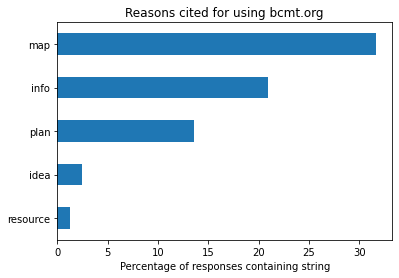

In [27]:
uses.sort_values(ascending=True).plot.barh();
plt.title("Reasons cited for using bcmt.org")
plt.xlabel("Percentage of responses containing string");

__How often do the words Google map, Windy, Navionics, Aquamaps, Tides, Current atlas, Gaia, Strava, Predict Wind, No appear in the responses for which mobile apps people use?__

In [28]:
df["mobile apps used"].to_list()

['no answer provided',
 'no answer provided',
 'total flow maps, tide tables',
 'yes',
 'tide apps, marine traffic, weather ',
 'aquamap tides gaiagps - for navigation tides and current',
 'no answer provided',
 'gps',
 'aquamap tides gaiagps - for navigation tides and current',
 'yes',
 'predict wind, easy gps (download to computer), gps track editor, home port',
 'navionics',
 'google maps. mostly my gps',
 'aquamap tides gaiagps - for navigation tides and current',
 'tides',
 'navionics',
 'google earth on my desktop to determine distance traveled with the line tool',
 'no',
 'no answer provided',
 'no answer provided',
 'no answer provided',
 'google earth with marine trail campsites down loaded and garmin navionics.',
 'yes, before and during. sometimes afterwords to cross reference.',
 'whale report',
 'wind prediction applications ',
 'canada maps, for route planning and location via android gps',
 'gaia',
 'yes, garmin gpsmap 78s with charting',
 'no answer provided',
 'strava.

In [30]:
has_google = df["mobile apps used"].str.contains("google", case=False)
#df.loc[has_google,"mobile apps used"]

In [31]:
has_windy = df["mobile apps used"].str.contains("windy", case=False)
#df.loc[has_windy,"mobile apps used"]

In [32]:
has_navionics = df["mobile apps used"].str.contains("navionics", case=False)
#df.loc[has_navionics,"mobile apps used"]

In [33]:
has_aquamaps = df["mobile apps used"].str.contains("aquamaps", case=False)
#df.loc[has_aquamaps,"mobile apps used"]

In [34]:
has_tides = df["mobile apps used"].str.contains("tides", case=False)
#df.loc[has_tides,"mobile apps used"]

In [35]:
has_atlas = df["mobile apps used"].str.contains("atlas", case=False)
#df.loc[has_atlas,"mobile apps used"]

In [36]:
has_gaia = df["mobile apps used"].str.contains("gaia", case=False)
#df.loc[has_gaia,"mobile apps used"]

In [37]:
has_strava = df["mobile apps used"].str.contains("strava", case=False)
#df.loc[has_strava,"mobile apps used"]

In [38]:
has_predict = df["mobile apps used"].str.contains("predict wind", case=False)
#df.loc[has_predict,"mobile apps used"]

In [39]:
has_garmin = df["mobile apps used"].str.contains("garmin", case=False)
#df.loc[has_garmin,"mobile apps used"]

In [40]:
has_no = df["mobile apps used"].str.contains("no", case=False)
#df.loc[has_no,"mobile apps used"]

In [45]:
has_null = df["mobile apps used"].str.contains("no answer provided", case=False)
#df.loc[has_null,"mobile apps used"]

In [54]:
strs = ["google","windy","navionics","aquamaps","tides","atlas","gaia","strava","predict wind","garmin","no","no answer provided"]

uses = pd.Series(index=strs, dtype=float)
uses.name = "percent_responses"
for str in strs:
    has_str = df["mobile apps used"].str.contains(str, case=False)
    uses[str] = 100*has_str.sum()/has_str.shape[0]
    print(f'Percentage of responses containing "{str.title()}": {np.round(100*has_str.sum()/has_str.shape[0],1)}%')

Percentage of responses containing "Google": 8.3%
Percentage of responses containing "Windy": 15.1%
Percentage of responses containing "Navionics": 13.2%
Percentage of responses containing "Aquamaps": 1.2%
Percentage of responses containing "Tides": 9.8%
Percentage of responses containing "Atlas": 0.9%
Percentage of responses containing "Gaia": 5.5%
Percentage of responses containing "Strava": 1.8%
Percentage of responses containing "Predict Wind": 1.5%
Percentage of responses containing "Garmin": 5.2%
Percentage of responses containing "No": 38.2%
Percentage of responses containing "No Answer Provided": 20.6%


In [59]:
# "title-ize" the app names
uses.index = uses.index.str.title()

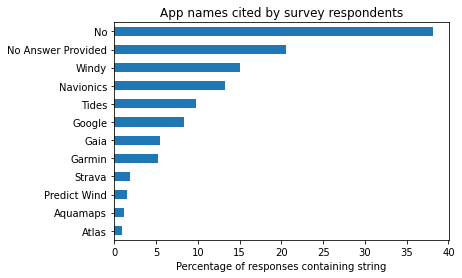

In [61]:
uses.sort_values(ascending=True).plot.barh();
plt.title("App names cited by survey respondents")
plt.xlabel("Percentage of responses containing string");